In [1]:
from vizman import viz
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

default_things: str = "../Pyvizman/vizman/"
default_colors: dict = viz.load_data_from_json(default_things + "colors.json")

viz.set_visual_style(
    json_color_path=default_things + "colors.json", change_colors=False
)

reciprocity_colors = sns.blend_palette(
    [default_colors["warms"]["YELLOW"],
    default_colors["purples"]["PURPLE"],
    default_colors["neutrals"]["HALF_BLACK"]],n_colors=3
)


In [2]:
network_type:str = "weighted" # binary or weighted

In [3]:
normality_dataset_path: str = f"datasets/{network_type}/normality/"
normality_dataset:np.ndarray = np.load(normality_dataset_path + "nn_synthetic.npy")


In [4]:
normality_dataset.shape

(3, 50, 11)

In [5]:
conditions:list = ['random', 'small_world', 'modular']
reciprocities:list = [str(i/10) for i in range(11)]
data: list = []

for i, condition in enumerate(conditions):
    for j, reciprocity in enumerate(reciprocities):
        for trial in normality_dataset[i, :, j]:
            data.append([condition, reciprocity, trial])

pd_normality_dataset = pd.DataFrame(data, columns=['condition', 'reciprocity', 'deviation'])


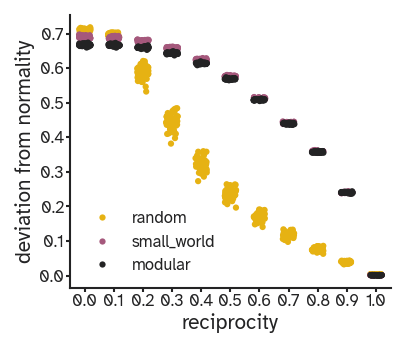

In [6]:
plt.figure(figsize=viz.cm_to_inch([7,6]), dpi=150)
sns.stripplot(pd_normality_dataset,x='reciprocity',
              y='deviation',
              hue='condition',
              s=3,
              jitter=0.2,
              palette=reciprocity_colors)
plt.legend(frameon=False,)
plt.ylabel("deviation from normality")
sns.despine()
plt.savefig(f"figures/{network_type}/normality.pdf",bbox_inches='tight', dpi=600)